In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras import models, layers, metrics

# Definir las métricas de recall y F1-score
recall = metrics.Recall()
f1_score = metrics.F1Score()

In [111]:
# Función para extraer espectrogramas de un archivo de audio

def extract_spectrogram(file_path, target_length=2):
    y, sr = librosa.load(file_path)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    #length_diff = target_length - spectrogram.shape[1]

    #if length_diff > 0:
        #spectrogram = np.pad(spectrogram, ((0, 0), (0, length_diff)), mode='constant')
    #else:
    #target_length = int(sr * target_length)
    spectrogram = spectrogram[:, :target_length]

    return librosa.power_to_db(spectrogram, ref=np.max)


# Ruta del directorio que contiene los archivos de audio
audio_directory_healthy = '/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos'
audio_directory_sick = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM_duplicado/export'

In [112]:

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms_list = []
labels_list = []


In [113]:
# Recorre los archivos de audio sanos
for filename in os.listdir(audio_directory_healthy):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_directory_healthy, filename)
        spectrogram = extract_spectrogram(file_path)
        spectrograms_list.append(spectrogram)
        labels_list.append('healthy')

In [114]:
# Recorre los archivos de audio enfermos
for filename in os.listdir(audio_directory_sick):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_directory_sick, filename)
        spectrogram = extract_spectrogram(file_path)
        spectrograms_list.append(spectrogram)
        labels_list.append('sick')

In [115]:
spectrograms_list

[array([[ -1.603461,   0.      ],
        [ -7.136324, -11.344253],
        [-12.357714, -17.383545],
        [-13.636413, -18.830202],
        [-14.556196, -19.128576],
        [-17.475544, -22.622185],
        [-19.716957, -23.146887],
        [-22.822584, -22.34885 ],
        [-24.56695 , -21.087442],
        [-22.329412, -23.234888],
        [-22.372526, -19.404219],
        [-23.070726, -18.934628],
        [-23.774069, -22.129297],
        [-23.069162, -21.486254],
        [-23.984587, -21.584923],
        [-24.060839, -21.907742],
        [-25.625807, -21.939219],
        [-28.227758, -22.883554],
        [-30.150146, -21.256247],
        [-32.40867 , -21.65088 ],
        [-32.54759 , -22.287815],
        [-33.33588 , -22.01088 ],
        [-30.45842 , -21.1458  ],
        [-33.114384, -21.634827],
        [-33.123196, -20.580648],
        [-32.299225, -19.913904],
        [-35.041676, -21.80708 ],
        [-31.620539, -21.103363],
        [-33.63788 , -21.489384],
        [-34.6

In [116]:
# Convierte las listas a matrices numpy
spectrograms_array = np.array(spectrograms_list)
labels_array = np.array(labels_list)

# Codifica las etiquetas
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_array)

In [117]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(spectrograms_array, labels_encoded, test_size=0.2, random_state=42)

# Agrega una dimensión para representar los canales en el espectrograma
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [118]:
# Crea un DataFrame con las características y las etiquetas
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

 #Crea un DataFrame con las características y las etiquetas para el conjunto de entrenamiento
columns = [f'feature_{i}' for i in range(X_train_flatten.shape[1])]
df_train = pd.DataFrame(data=X_train_flatten, columns=columns)
df_train['label'] = label_encoder.inverse_transform(y_train)

# Crea un DataFrame con las características y las etiquetas para el conjunto de prueba
columns = [f'feature_{i}' for i in range(X_test_flatten.shape[1])]
df_test = pd.DataFrame(data=X_test_flatten, columns=columns)
df_test['label'] = label_encoder.inverse_transform(y_test)

# Muestra los primeros registros del DataFrame de entrenamiento
print("DataFrame de Entrenamiento:")
print(df_train.head(10))

DataFrame de Entrenamiento:
   feature_0     feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -4.559430  0.000000e+00 -13.584300 -12.733468 -18.493834 -23.106972   
1  -1.271324 -4.768372e-07  -9.283327 -11.746323 -15.780571 -17.399448   
2  -1.174449  0.000000e+00  -7.512123 -11.020419 -13.841535 -13.144361   
3  -5.392065  0.000000e+00 -14.855874  -7.859513 -23.645264 -19.036819   
4  -7.892896 -9.536743e-07 -11.746863  -9.800683 -12.261554 -10.121642   
5 -10.889618 -7.860241e-01 -14.328152  -9.227886 -15.654255  -9.882389   
6   0.000000 -3.593440e+00  -4.676507  -9.266932  -7.979087 -11.205693   
7  -1.529865  0.000000e+00  -7.718892  -9.889109 -14.952463 -20.949127   
8  -4.739134  0.000000e+00 -10.323019  -6.649874 -18.413168 -19.684473   
9  -1.928887  0.000000e+00  -6.831811  -5.801841 -14.935386 -12.857846   

   feature_6  feature_7  feature_8  feature_9  ...  feature_247  feature_248  \
0 -21.477253 -25.295971 -24.938721 -29.882832  ...   -63.403259   -64.416321 

In [119]:
# Verificar desequilibrio en las clases
desequilibrio_clases = df_train['label'].value_counts()
print("Distribución de clases:")
print(desequilibrio_clases)
# 1= enfermo
# 2= sano

Distribución de clases:
sick       1408
healthy    1296
Name: label, dtype: int64


In [120]:
# Construye el modelo CNN
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))
# Construye el modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(X_train.shape[1:])))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [121]:
# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
# Entrena el modelo
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
85/85 [==============================] - 3s 18ms/step - loss: 1.2316 - accuracy: 0.5100 - val_loss: 0.6903 - val_accuracy: 0.5547
Epoch 2/30
85/85 [==============================] - 1s 16ms/step - loss: 0.6879 - accuracy: 0.5492 - val_loss: 0.6813 - val_accuracy: 0.5636
Epoch 3/30
85/85 [==============================] - 1s 16ms/step - loss: 0.6838 - accuracy: 0.5651 - val_loss: 0.6812 - val_accuracy: 0.5695
Epoch 4/30
85/85 [==============================] - 1s 15ms/step - loss: 0.6739 - accuracy: 0.5695 - val_loss: 0.7153 - val_accuracy: 0.4808
Epoch 5/30
85/85 [==============================] - 1s 16ms/step - loss: 0.6691 - accuracy: 0.5784 - val_loss: 0.6857 - val_accuracy: 0.5429
Epoch 6/30
85/85 [==============================] - 2s 20ms/step - loss: 0.6603 - accuracy: 0.6058 - val_loss: 0.6752 - val_accuracy: 0.5725
Epoch 7/30
85/85 [==============================] - 3s 32ms/step - loss: 0.6543 - accuracy: 0.6039 - val_loss: 0.6803 - val_accuracy: 0.5607
Epoch 8/30
85

In [123]:
# Evalúa el modelo


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy on test set: {test_acc}')



22/22 [==============================] - 0s 4ms/step - loss: 0.8039 - accuracy: 0.6109
Accuracy on test set: 0.610946774482727


In [124]:
from sklearn.metrics import recall_score, f1_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype('int')  # Convertir las probabilidades en etiquetas binarias

# Calcular recall y F1-score
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Recall:", recall)
print("F1-score:", f1)

22/22 [==============================] - 0s 4ms/step
Recall: 0.6424050632911392
F1-score: 0.6068759342301943


In [125]:
# Puedes utilizar el modelo entrenado para hacer predicciones en nuevos datos
# Ejemplo de predicción en un nuevo espectrograma
#new_spectrogram = extract_spectrogram('/content/1855-phrase.wav')
#new_spectrogram = new_spectrogram[np.newaxis, ..., np.newaxis]
#prediction = model.predict(new_spectrogram)
#print(prediction)

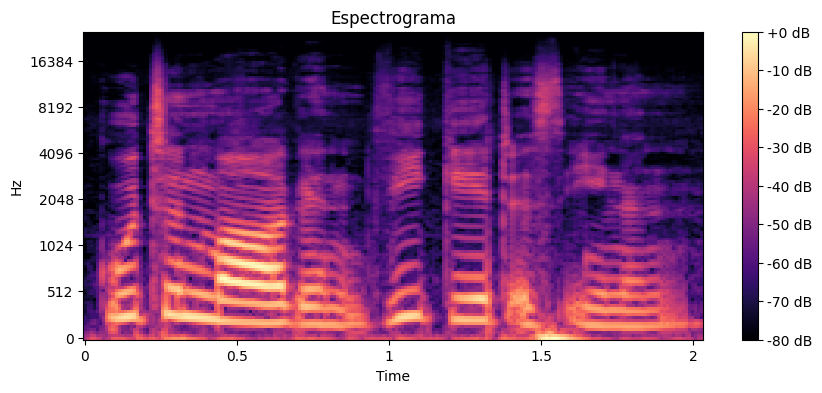

Dimensiones del espectrograma: (128, 199)


In [126]:

#y, sr = librosa.load(/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos/Copia de 1-phrase.wav)
#spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
#length_diff = target_length - spectrogram.shape[1]

#if length_diff > 0:
    #spectrogram = np.pad(spectrogram, ((0, 0), (0, length_diff)), mode='constant')
#else:
#spectrogram = spectrogram[:, :target_length]
#spectrogram.shape


import librosa
import librosa.display
import matplotlib.pyplot as plt

# Ruta del archivo de audio
audio_file = '/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos/Copia de 1-phrase.wav'

# Cargar el archivo de audio y obtener la forma de onda y la tasa de muestreo (sample rate)
y, sr = librosa.load(audio_file, sr=None)

# Calcular el espectrograma
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

# Mostrar las dimensiones del espectrograma
print("Dimensiones del espectrograma:", spectrogram.shape)

